# This code walks through a Support Vector Machine exercise using the MNIST database. The MNIST database has 70,000 handwritten digits. The data set is useful for testing and developing classification and image recognition algorithms and saves developers from having to develop and preprocess their own data.

http://yann.lecun.com/exdb/mnist/

https://en.wikipedia.org/wiki/MNIST_database


In [ ]:
print("ML Lab")

ML Lab



# This section of the code imports necessary libraries for our SVM classification work and also for visualizing the data. This includes importing the mnist library, which is the source of our data.`

In [ ]:
from keras.datasets import mnist #importing keras library for importing mnist dataset ref:https://keras.io/api/datasets/
import numpy as np # numpy library is imported for performing array operations ref:https://numpy.org/doc/stable/user/index.html#user
import math # imported to perform mathametical operations
import matplotlib.pyplot as plt # imported to perform plot the data ref:https://matplotlib.org/3.5.1/tutorials/introductory/pyplot.html
from sklearn import svm, metrics # importing support vector machines(svm), Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
import itertools #

# The next code snippet is used to load the training and test data. MNIST data is split into a training set of 60,000 data points and a test set of 10,000 data points.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #segregating train labels & data and test labels & data
train_images_data = X_train #mnist.train_images
print("Importing mnist images and labels")

11490434/11490434 [==============================] - 0s 0us/step
Importing mnist images and labels


# This snippet is checking to see that their are images and associated labels.

In [ ]:
img = X_test #mnist.test_images
test_labels = y_test #mnist.test_labels
print("Testing images and labels")

Testing images and labels


# The next snippet is reshaping the data to account for the 28 x 28 sizing of the handwritten digits

In [ ]:
#Reshaping the data according to our classifier requirements
train_images = np.reshape(train_images_data, (60000, 28*28)) #reshaping the train_images
train_labels = y_train #train_lables
img = np.reshape(X_test,(10000, 28*28)) #reshaping the test_images

# Our classifier uses RBF kernel to move our data into 3D space.

Ref: https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a

# This next snippet of code is the portion that executes training of the SVM classifier. This is where you can manipulate hyperparameters of C and gamma to affect the performance of the classifier.

# Note, the model is currently only considering four of the possible ten (0-9) digits.

In [ ]:
idx = (train_labels == 2)|(train_labels == 4 )|(train_labels == 9)|(train_labels == 1 )
X = train_images[idx]/255.0 #Normalizing the images for simpler classification
Y = train_labels[idx]
svc = svm.SVC(C=10 , gamma=0.5).fit(X, Y) #gamma value defines the margin length on both side of the line or polynomial curve Ref: 

# The next snippet is running the test data through the trained classifier.

In [ ]:
idx = (test_labels == 2)|(test_labels == 4 )|(test_labels == 9)|(test_labels == 1)
X_test = img[idx]/255.0 #Normalizing the image
Y_test = test_labels[idx]
y_pred = svc.predict(X_test) #Predicting the images to classify into multiple groups using the trained svm model

# The next snippet produces a Confusion Matrix, which is one way of assessing the performance of your SVM classifier

Understanding Confusion Matrix: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

Ref for confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


In [ ]:
# This function displays the results of the confusion matrix

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print("Confusion matix, without normalization")
    print(cm)
    plt.imshow(cm, interpolation= 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('predicted label')

Confusion matix, without normalization
[[ 936  199    0    0]
 [   0 1032    0    0]
 [   0  932   49    1]
 [   0  666    0  343]]


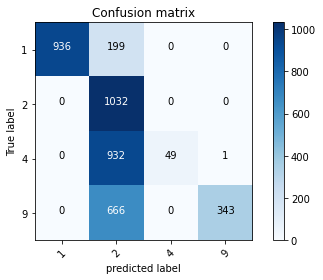

In [ ]:
cm  = metrics.confusion_matrix(Y_test,y_pred) # we are analysing our classification model based on the actual labels and predicted lables of the testing images
plot_confusion_matrix(cm, [1,2,4,9], normalize=False) # ploting confusion matrix

In [ ]:
cm

array([[ 936,  199,    0,    0],
       [   0, 1032,    0,    0],
       [   0,  932,   49,    1],
       [   0,  666,    0,  343]])

# The next snippet allow you to see the images where prediction and truth are not aligned.

In [ ]:
idx = np.where((y_pred == 4) & (Y_test ==9))[0] # finding the images where character 4 is predicted instead of character 9
fig = plt.figure(figsize=(5, 30))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx), 1, i+1)
    imgplot = ax.imshow(np.reshape(X_test[idx[i],:],(28, 28)), cmap=plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation("nearest")
plt.show()
print(range(len(idx)))

<Figure size 360x2160 with 0 Axes>

range(0, 0)
